# ML: Homework 2 - Question 4 through 6
## Arash Latifi - 810197576
### Srping 2022

---
# Q4) Overfitting and Underfitting

First, we create raw data using python numpy list.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.arange(-10 , 10 , 0.2)
y = 2 * np.cos(x)/(-np.pi) + 2 * np.sin(2*x)/(2*np.pi) + 2 * np.cos (3*x)/(-3*np.pi)

P1) Adding the white gaussian noise to the data.

In [3]:
y1 = y + 0.12 * np.random.standard_normal(size = len(y))
y2 = y + 0.12 * np.random.poisson(lam = 2, size = len(y))

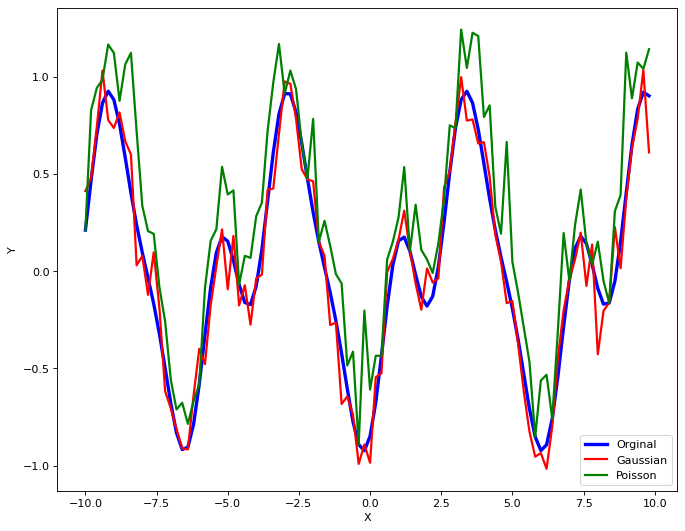

In [20]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y, color = 'Blue', linewidth = 3)
plt.plot(x, y1, color = 'red', linewidth = 2)
plt.plot(x, y2, color = 'green', linewidth = 2)
plt.legend(["Orginal", "Gaussian", "Poisson"], loc ="lower right")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
yt1 = []
yt2 = []
mse1 = []
mse2 = []
for i in range(15):
    yt1.append(np.poly1d(np.polyfit(x, y1, i+1))(x))
    mse1.append((np.square(y - yt1[i])).mean())
    yt2.append(np.poly1d(np.polyfit(x, y2, i+1))(x))
    mse2.append((np.square(y - yt2[i])).mean())

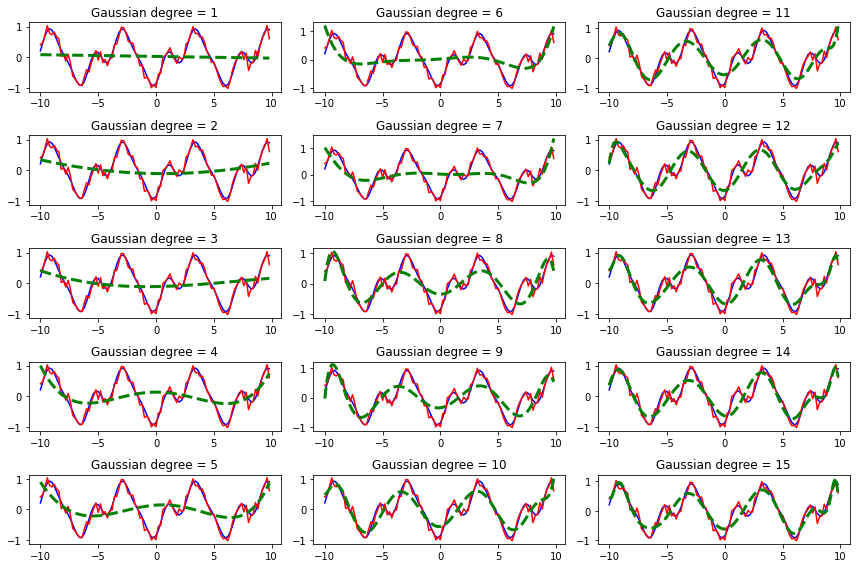

In [23]:
fig, axes = plt.subplots(5, 3, figsize = (12, 8))
for i in range(15):
    axes[i % 5][i // 5].plot(x, y, color = 'blue', label = "Original")
    axes[i % 5][i // 5].plot(x, y1, color = 'red', label = "Gaussian")
    axes[i % 5][i // 5].plot(x, yt1[i], color = 'green', label = "fit:" + str(i+1), linestyle = 'dashed', linewidth = 3)
    axes[i % 5][i // 5].set_title('Gaussian degree = {}'.format(i + 1))
fig.tight_layout()

Text(0.5, 0, 'Degree')

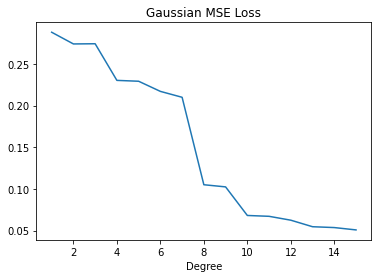

In [26]:
plt.figure()
plt.plot(range(1, 16), mse1)
plt.title('Gaussian MSE Loss')
plt.xlabel('Degree')

As seen above, the fifteenth degree has the lowest error.

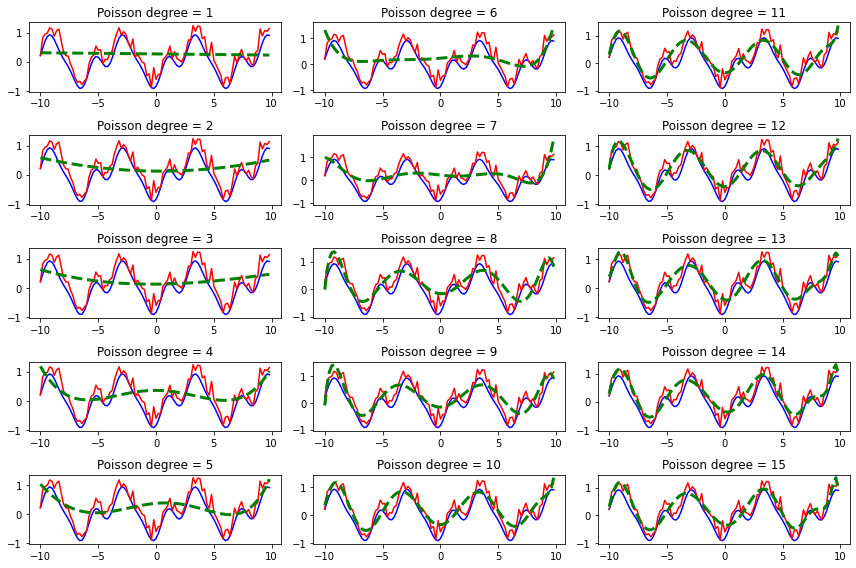

In [24]:
fig, axes = plt.subplots(5, 3, figsize = (12, 8))
for i in range(15):
    axes[i % 5][i // 5].plot(x, y, color = 'blue', label = "Original")
    axes[i % 5][i // 5].plot(x, y2, color = 'red', label = "Gaussian")
    axes[i % 5][i // 5].plot(x, yt2[i], color = 'green', label = "fit:" + str(i+1), linestyle = 'dashed', linewidth = 3)
    axes[i % 5][i // 5].set_title('Poisson degree = {}'.format(i + 1))
fig.tight_layout()

Text(0.5, 0, 'Degree')

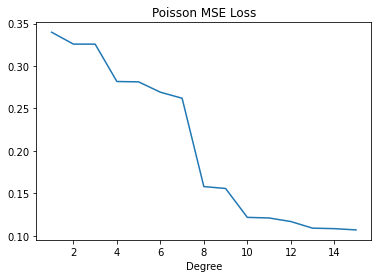

In [27]:
plt.figure()
plt.plot(range(1, 16), mse2)
plt.title('Poisson MSE Loss')
plt.xlabel('Degree')

As seen above, the fifteenth degree has the lowest error.

In [30]:
best1 = np.where(mse1 == np.amin(mse1))[0][0]
best2 = np.where(mse2 == np.amin(mse2))[0][0]

MSE for degree 0 is 0.288
MSE for degree 3 is 0.230
MSE for degree 6 is 0.210
MSE for degree 14 is 0.051


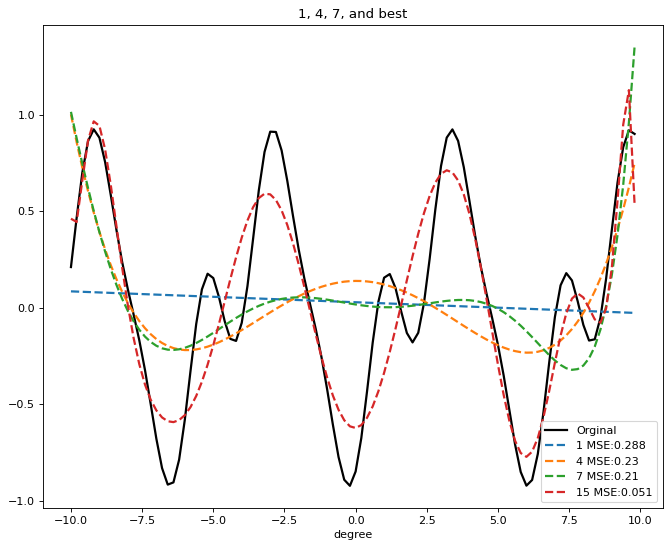

In [45]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y, linewidth = 2, label = "Orginal", color = 'black')
for i in [0, 3, 6, 14]:
    plt.plot(x, yt1[i], linestyle = 'dashed', linewidth = 2, label = str(i+1) + " MSE:" + str(round(mse1[i],3)))
    print('MSE for degree {} is {:.3f}'.format(i, mse1[i]))
plt.title('1, 4, 7, and best')
plt.xlabel('degree')
plt.legend(loc ="lower right")
plt.show()

MSE for degree 0 is 0.340
MSE for degree 3 is 0.282
MSE for degree 6 is 0.262
MSE for degree 14 is 0.107


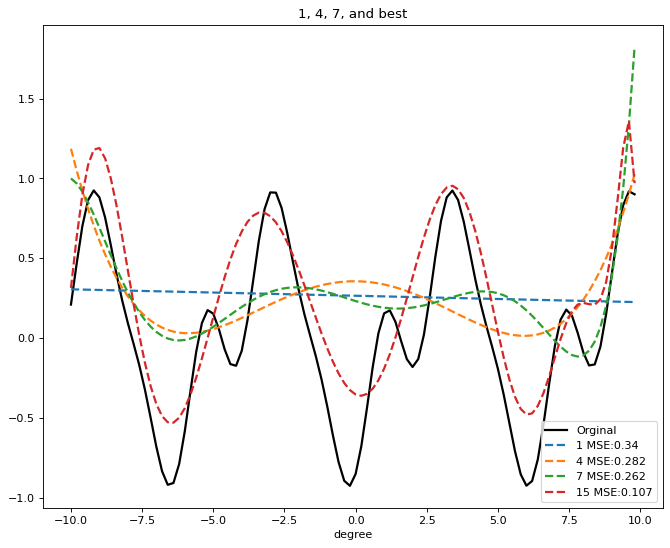

In [44]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y, linewidth = 2, label = "Orginal", color = 'black')
for i in [0, 3, 6, 14]:
    plt.plot(x, yt2[i], linestyle = 'dashed', linewidth = 2, label = str(i+1) + " MSE:" + str(round(mse2[i],3)))
    print('MSE for degree {} is {:.3f}'.format(i, mse2[i]))
plt.title('1, 4, 7, and best')
plt.xlabel('degree')
plt.legend(loc ="lower right")
plt.show()

 ---

# Q5) Stress Lysis Dataset

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score

In [47]:
data = pd.read_csv('Stress-Lysis.csv')
data.head(3)

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,mid
1,21.41,90.41,93,mid
2,27.12,96.12,196,high


### Alef)

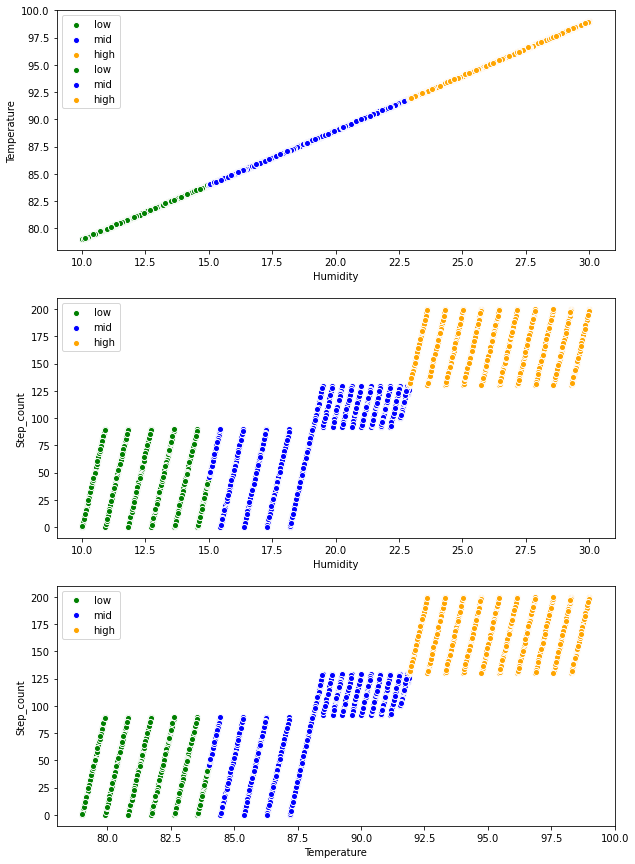

In [49]:
fig, axes = plt.subplots(3, 1, figsize = (10, 15))

axes[0].scatter(data[data["Stress_Level"] == 'low']['Humidity'], data[data["Stress_Level"] == 'low']['Temperature'], 
            marker = '.', edgecolor = 'white', facecolors='green', s=150, label='low')
axes[0].scatter(data[data["Stress_Level"] == 'mid']['Humidity'], data[data["Stress_Level"] == 'mid']['Temperature'], 
            marker = '.', edgecolor = 'white', facecolors='blue', s=150, label='mid')
axes[0].scatter(data[data["Stress_Level"] == 'high']['Humidity'], data[data["Stress_Level"] == 'high']['Temperature'], 
            marker = '.', edgecolor = 'white', facecolors='orange', s=150, label='high')
axes[0].set_xlabel('Humidity')
axes[0].set_ylabel('Temperature')
axes[0].legend(loc='upper left')


axes[0].scatter(data[data["Stress_Level"] == 'low']['Humidity'], data[data["Stress_Level"] == 'low']['Temperature'], 
            marker = '.', edgecolor = 'white', facecolors='green', s=150, label='low')
axes[0].scatter(data[data["Stress_Level"] == 'mid']['Humidity'], data[data["Stress_Level"] == 'mid']['Temperature'], 
            marker = '.', edgecolor = 'white', facecolors='blue', s=150, label='mid')
axes[0].scatter(data[data["Stress_Level"] == 'high']['Humidity'], data[data["Stress_Level"] == 'high']['Temperature'], 
            marker = '.', edgecolor = 'white', facecolors='orange', s=150, label='high')
axes[0].set_xlabel('Humidity')
axes[0].set_ylabel('Temperature')
axes[0].legend(loc='upper left')


axes[1].scatter(data[data["Stress_Level"] == 'low']['Humidity'], data[data["Stress_Level"] == 'low']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='green', s=151, label='low')
axes[1].scatter(data[data["Stress_Level"] == 'mid']['Humidity'], data[data["Stress_Level"] == 'mid']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='blue', s=151, label='mid')
axes[1].scatter(data[data["Stress_Level"] == 'high']['Humidity'], data[data["Stress_Level"] == 'high']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='orange', s=151, label='high')
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Step_count')
axes[1].legend(loc='upper left')


axes[2].scatter(data[data["Stress_Level"] == 'low']['Temperature'], data[data["Stress_Level"] == 'low']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='green', s=150, label='low')
axes[2].scatter(data[data["Stress_Level"] == 'mid']['Temperature'], data[data["Stress_Level"] == 'mid']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='blue', s=150, label='mid')
axes[2].scatter(data[data["Stress_Level"] == 'high']['Temperature'], data[data["Stress_Level"] == 'high']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='orange', s=150, label='high')
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('Step_count')
axes[2].legend(loc='upper left')

tozihat inke kodom vase tabaghe band khati behtare

### Be) 

In [58]:
def standardize(X_tr):
    return (X_tr - X_tr.mean()) / (X_tr.max() - X_tr.min())

In [59]:
st_data = standardize(data.drop(columns=['Stress_Level']))
st_data['target'] = data['Stress_Level']

In [60]:
train = st_data.sample(frac=0.8)
test = st_data.drop(train.index)

Ytrain = train['target']
Xtrain = train.drop(columns=['target'])

Ytest = test['target']
Xtest = test.drop(columns=['target'])

In [61]:
Xtrain.head(3)

,Humidity,Temperature,Step_count
1146,0.1810,0.1810,0.149293
1221,0.1905,0.1905,0.244293
1635,0.4710,0.4710,0.209293


### Logistic Regression with 1_vs_all

In [139]:
def sigmoid(z):
  sig = 1.0 / (1 + np.exp(-z))
  return sig

def cost(y_true, y_pred):
  ltt = np.matmul(y_true.T, np.log(y_pred)) + np.matmul((1 - y_true).T, np.log(1 - y_pred))
  loss = -1 / len(y_pred) * ltt[0]
  return loss

def forwardPropagate(X, W, y_true):
  Z = np.matmul(X, W)
  Activ = sigmoid(Z)
  loss = cost(y_true, sigmoid(Z))
  y_pred = np.zeros(Activ.shape)
  y_pred[Activ >= 0.5] = 1
  return y_pred, Activ, loss

def backPropagate(Activ, y, X):
  dw = 1 / len(Activ) * np.matmul(X.T, Activ[0] - y)
  return dw

In [187]:
epochs = 200
lr = 0.25
m = len(y)

In [188]:
y = np.zeros((3, len(Ytrain)))

y[0][Ytrain == 'low'] = 1
y[1][Ytrain == 'mid'] = 1
y[2][Ytrain == 'high'] = 1
Loss = []
allWeights = []

for j in range(3):
    weights = np.random.randn(Xtrain.shape[1], 1)
    for i in range(epochs):
        y_pred, A, loss = forwardPropagate(Xtrain, weights, y[j])
        Loss.append(loss)
        dw = backPropagate(A, y[j], Xtrain)
        weights = weights - lr * dw.to_numpy()
    allWeights.append(weights)

In [194]:
y_pred_train = np.zeros((len(Xtrain), 3))
for i, weight in enumerate(allWeights):
    prediction = sigmoid(np.matmul(Xtrain, weight))
    y_pred_train[:, i] = prediction.reshape((len(Xtrain), ))

y_pred = np.argmax(y_pred_train, axis = 1)

y_true = np.zeros(y_pred.shape)
y_train = np.reshape(Ytrain, (len(Ytrain), ))
y_true[y_train == 'low'] = 0
y_true[y_train == 'mid'] = 1
y_true[y_train == 'high'] = 2
totalTrainAcc = accuracy_score(y_true, y_pred)

y_pred_test = np.zeros((len(Xtest), 3))
for i, weight in enumerate(allWeights):
    prediction = sigmoid(np.matmul(Xtest, weight))
    y_pred_test[:, i] = prediction.reshape((len(Xtest), ))

y_pred = np.argmax(y_pred_test, axis = 1)

y_true = np.zeros(y_pred.shape)
y_test = np.reshape(Ytest, (len(Ytest), ))
y_true[y_train == 'low'] = 0
y_true[y_train == 'mid'] = 1
y_true[y_train == 'high'] = 2
totalTestAcc = accuracy_score(y_true, y_pred)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [307]:
import prettytable

x = prettytable.PrettyTable(["" ," ", "Pred", "cted", "  "])
x.add_row(["" ," ", "Low", "Mid", "High"])
x.add_row(["Actual" ,"Low", "1" ,"1" ,"1"])
x.add_row(["" ,"Mid", "1" ,"1" ,"1"])
x.add_row(["" ,"High", "1" ,"1" ,"1"])
print(x)
print("Train Acurecy: ",logi.score(Xtrain, Ytrain))
print("Test Acurecy:  ",logi.score(Xtest, Ytest))

+--------+------+------+------+------+
|        |      | Pred | cted |      |
+--------+------+------+------+------+
|        |      | Low  | Mid  | High |
| Actual | Low  |  1   |  1   |  1   |
|        | Mid  |  1   |  1   |  1   |
|        | High |  1   |  1   |  1   |
+--------+------+------+------+------+
Train Acurecy:  0.905683947532792
Test Acurecy:   0.915


### Jim) 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, jaccard_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

In [13]:
X = data.drop(columns=['Stress_Level'])
y = data['Stress_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
model = LogisticRegression()
ovr = OneVsRestClassifier(model)
ovr.fit(X_train, y_train)
yhat = ovr.predict(X_test)
cm = confusion_matrix(y_test, yhat)
sc = ovr.score(X_test, y_test)
kf = roc_auc_score(y, ovr.predict_proba(X), multi_class='ovr')
jk = jaccard_score(yhat, y_test, average=None)

In [20]:
print("Confusion Matrix:\n", cm)
print("Score:\n", sc)
print("Roc Auc Score:\n", kf)
print("Jaccard Score:\n", jk)

Confusion Matrix:
 [[129   0   0]
 [  0  96   0]
 [  0   0 176]]
Score:
 1.0
Roc Auc Score:
 1.0
Jaccard Score:
 [1. 1. 1.]


 ---

# Q6) Logistic Regression

In [344]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [345]:
def DayereSaz(quantity, rho_start, rho_end, center_x, center_y):
    rhos = np.random.rand(quantity,1) * (rho_end-rho_start) + rho_start
    phases = np.random.rand(quantity,1) * 2 * math.pi
    vec = []
    for i in range(len(rhos)):
        vec.append(complex(rhos[i] * math.cos(phases[i]), rhos[i] * math.sin(phases[i])))
    # extract real part
    x = [ele.real+center_x for ele in vec]
    # extract imaginary part
    y = [ele.imag+center_y for ele in vec]
    return x,y

In [346]:
# First Mode: 
x11, y11 = DayereSaz(200, 4, 9, 1.5, 0)
x12, y12 = DayereSaz(200, 0, 6, 1.5, 0)

In [347]:
# Second Mode: 
x21 = np.random.normal(1.5, 1, 100)
y21 = np.random.normal(0, 1, 100)
x22, y22 = DayereSaz(200, 2, 6, 1.5, 0)

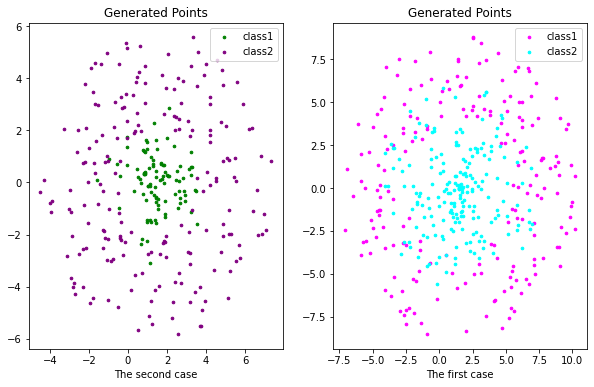

In [348]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[1].scatter(x11, y11, color='magenta', s=7, label='class1')
ax[1].scatter(x12, y12, color='cyan', s=7, label='class2')
ax[1].legend(loc ="upper right")
ax[1].set_xlabel(xlabel = 'The first case')

ax[0].scatter(x21, y21, color='green', s=7, label='class1')
ax[0].scatter(x22, y22, color='purple', s=7, label='class2')
ax[0].legend(loc ="upper right")
ax[0].set_xlabel(xlabel = 'The second case')

for a in ax.flat:
    a.set_title("Generated Points", fontsize=12)

In [ ]:
def expandFeatureSpace(X, n):
  X1 = np.reshape(X[:, 0], (len(X), 1))
  X2 = np.reshape(X[:, 1], (len(X), 1))
  out = np.ones((len(X), 1))
  for i in range(1, n + 1):
    for j in range(i + 1):
      # print(i, j)
      new = X1**(i-j) * X2**(j)
      out = np.concatenate((out, new), axis = 1)
  # out = out[:, 1:]
  return out

### From Sratch)

### Using Scikit) 